In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
file_path = '/Users/aizixin/Desktop/Scaled Top10 Data.xlsx'
data = pd.read_excel(file_path)

# Prepare the data
X = data.drop(columns=['Instrument', 'ROA'])
y = data['ROA']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to plot model results
def plot_model_results(y_test, y_pred, model_name):
    plt.figure(figsize=(15, 5))
    
    # Actual vs Predicted
    plt.scatter(range(len(y_test)), y_test, color='blue', label='Targets')
    plt.scatter(range(len(y_test)), y_pred, color='orange', label='Predictions')
    
    # Error bars
    for i in range(len(y_test)):
        plt.plot([i, i], [y_test.iloc[i], y_pred[i]], color='red')
    
    # Labels and title
    plt.xlabel('Companies')
    plt.ylabel('ROA')
    plt.title(f'Test Set Results - {model_name}')
    plt.legend()
    plt.xticks(ticks=range(len(y_test)), labels=X_test.index, rotation=90, fontsize=8)
    plt.show()


Linear Regression RMSE: 0.0074655362066835965


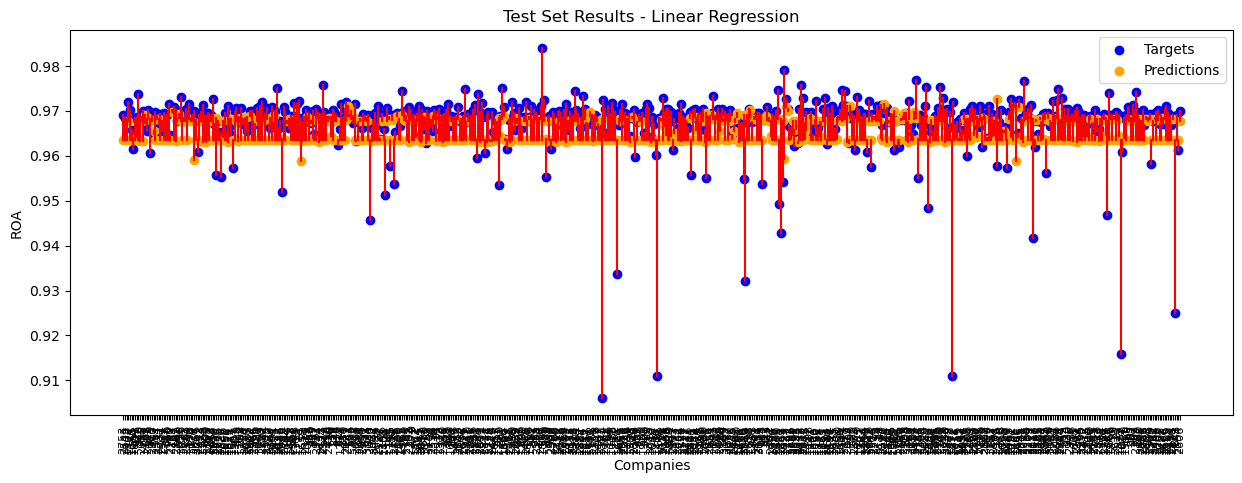

In [3]:
# 1. Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(f'Linear Regression RMSE: {rmse_lr}')
plot_model_results(y_test, y_pred_lr, 'Linear Regression')

K-Nearest Neighbors RMSE: 0.022036265364244023


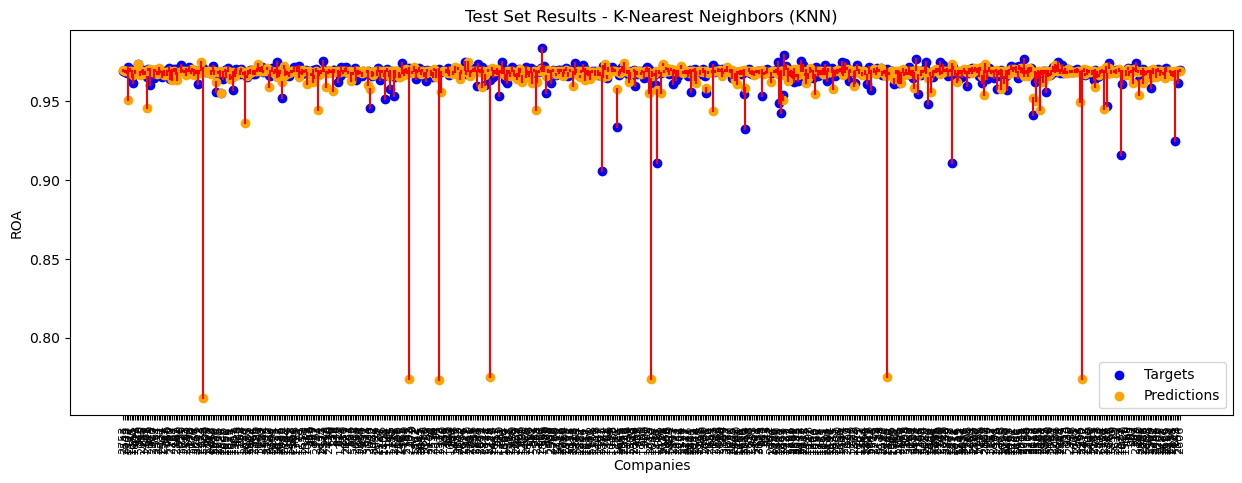

In [4]:
# 2. K-Nearest Neighbors (KNN)
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
print(f'K-Nearest Neighbors RMSE: {rmse_knn}')
plot_model_results(y_test, y_pred_knn, 'K-Nearest Neighbors (KNN)')

Decision Trees RMSE: 0.06628009974797393


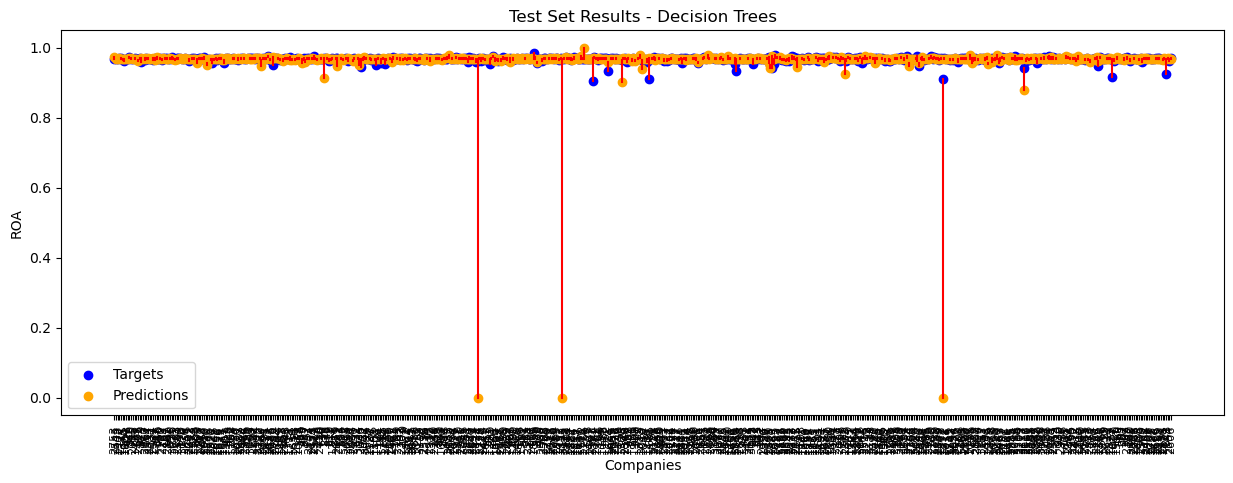

In [5]:
# 3. Decision Trees
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
print(f'Decision Trees RMSE: {rmse_tree}')
plot_model_results(y_test, y_pred_tree, 'Decision Trees')

Random Forests RMSE: 0.01857844566708215


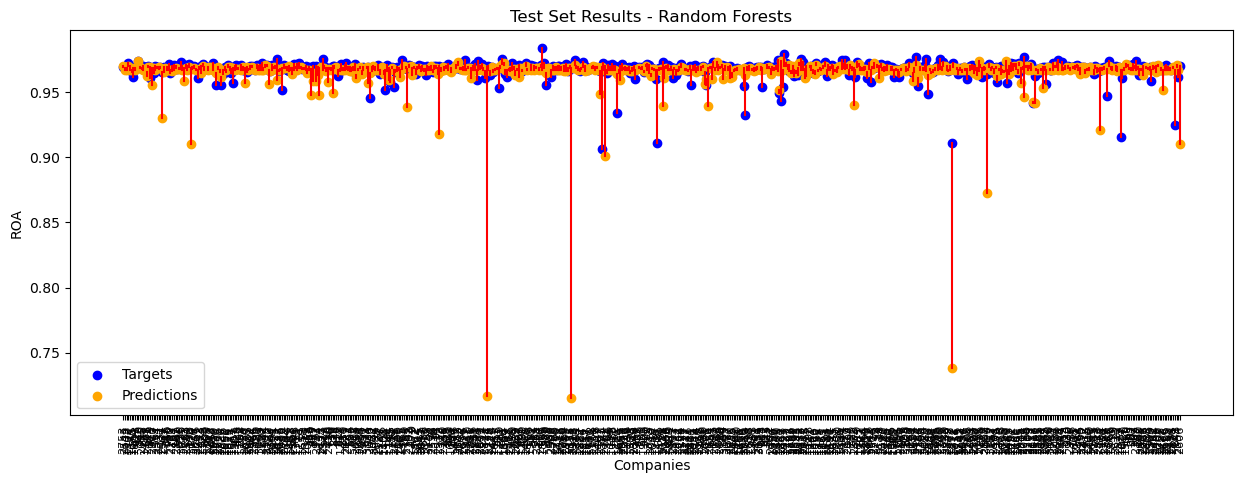

In [6]:
# 4. Random Forests
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)
rmse_forest = np.sqrt(mean_squared_error(y_test, y_pred_forest))
print(f'Random Forests RMSE: {rmse_forest}')
plot_model_results(y_test, y_pred_forest, 'Random Forests')

Artificial Neural Networks RMSE: 0.011270059822154612


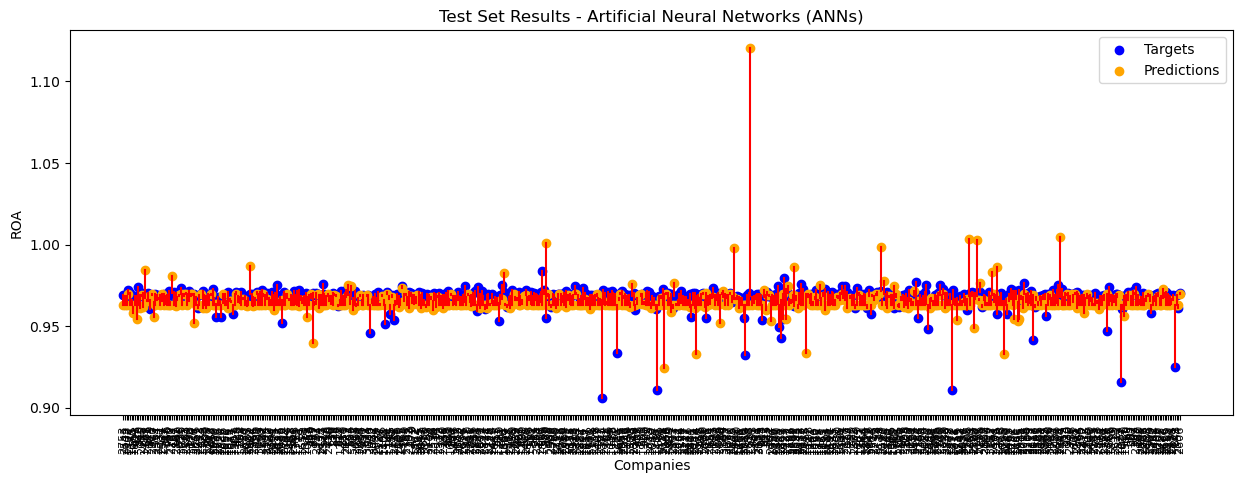

In [7]:
# 5. Artificial Neural Networks (ANNs)
ann_model = MLPRegressor(hidden_layer_sizes=(50, 25), max_iter=1000, random_state=42)
ann_model.fit(X_train, y_train)
y_pred_ann = ann_model.predict(X_test)
rmse_ann = np.sqrt(mean_squared_error(y_test, y_pred_ann))
print(f'Artificial Neural Networks RMSE: {rmse_ann}')
plot_model_results(y_test, y_pred_ann, 'Artificial Neural Networks (ANNs)')

Linear Regression - RMSE Train: 0.04585262097720813, RMSE Test: 0.0074655362066835965


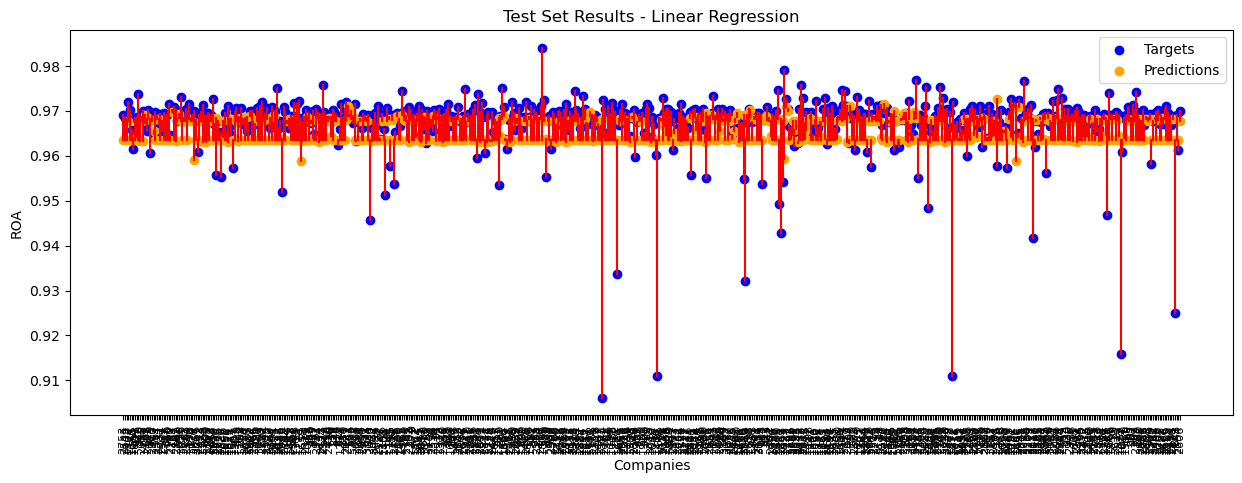

K-Nearest Neighbors (KNN) - RMSE Train: 0.03925772824368579, RMSE Test: 0.022036265364244023


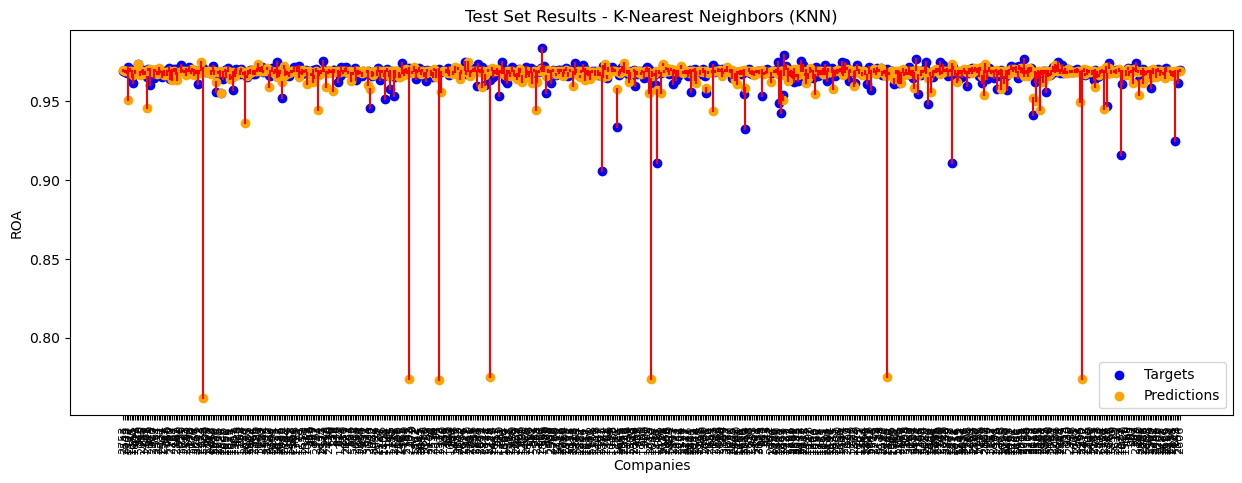

Decision Trees - RMSE Train: 0.012868431891874543, RMSE Test: 0.06628009974797393


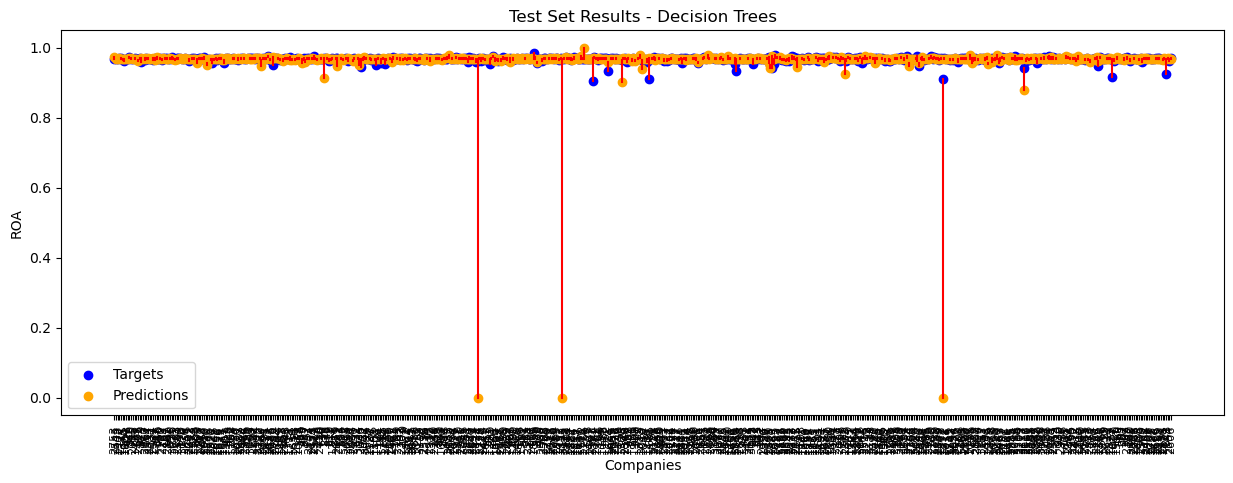

Random Forests - RMSE Train: 0.02294071719510591, RMSE Test: 0.01857844566708215


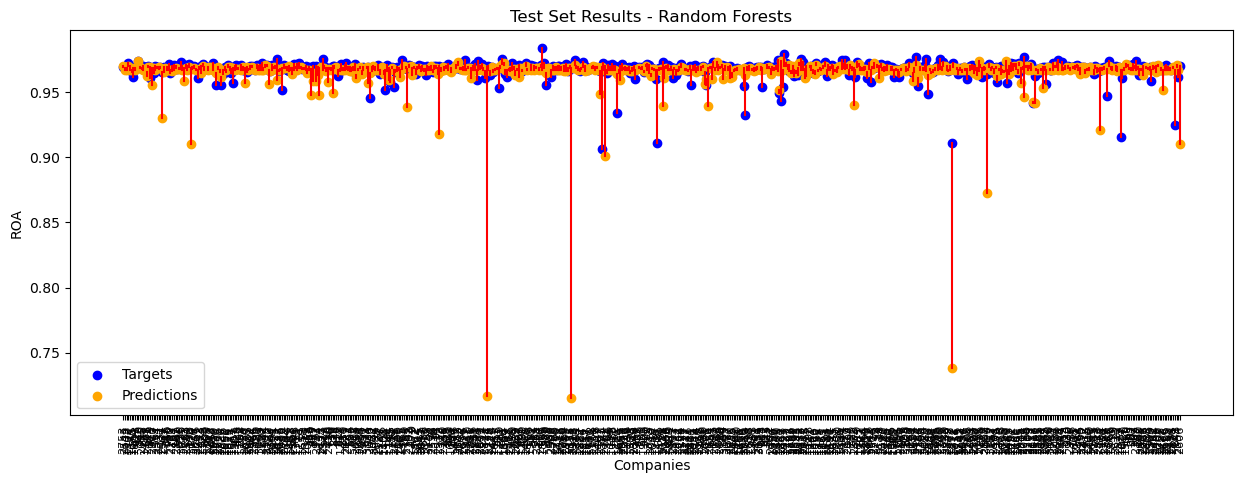

Artificial Neural Networks (ANNs) - RMSE Train: 0.04632610467842792, RMSE Test: 0.011270059822154612


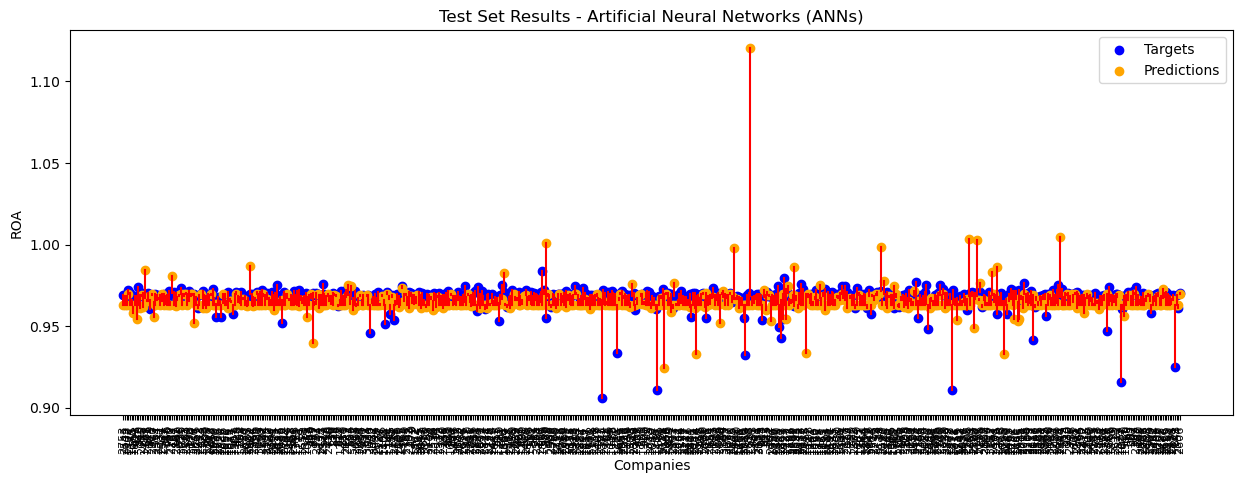

<Figure size 1000x600 with 0 Axes>

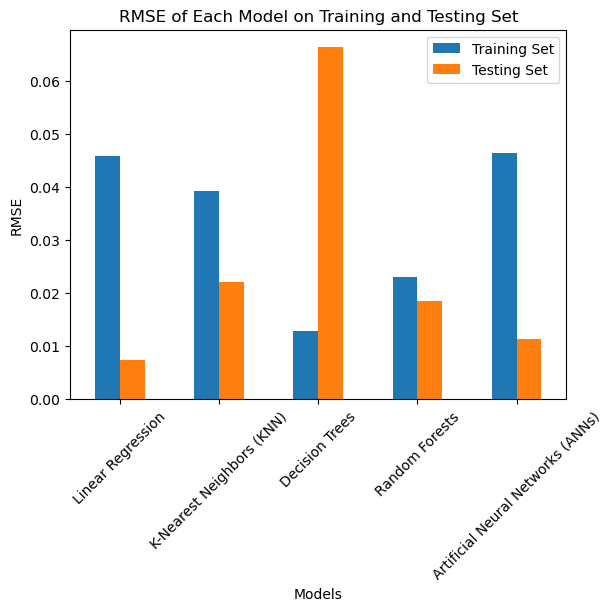

In [8]:
# Function to calculate RMSE
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Function to train and evaluate models
def train_evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    rmse_train = calculate_rmse(y_train, y_train_pred)
    rmse_test = calculate_rmse(y_test, y_test_pred)
    
    print(f'{model_name} - RMSE Train: {rmse_train}, RMSE Test: {rmse_test}')
    return rmse_train, rmse_test, y_test_pred

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'K-Nearest Neighbors (KNN)': KNeighborsRegressor(n_neighbors=5),
    'Decision Trees': DecisionTreeRegressor(random_state=42),
    'Random Forests': RandomForestRegressor(n_estimators=100, random_state=42),
    'Artificial Neural Networks (ANNs)': MLPRegressor(hidden_layer_sizes=(50, 25), max_iter=1000, random_state=42)
}

# Dictionary to store RMSE values
rmse_values = {}

# Train and evaluate each model
for model_name, model in models.items():
    rmse_train, rmse_test, y_test_pred = train_evaluate_model(model, X_train, y_train, X_test, y_test, model_name)
    rmse_values[model_name] = {'train': rmse_train, 'test': rmse_test}
    # Plot results
    plot_model_results(y_test, y_test_pred, model_name)

# Visualize RMSE values
rmse_df = pd.DataFrame(rmse_values).T

plt.figure(figsize=(10, 6))
rmse_df.plot(kind='bar')
plt.title('RMSE of Each Model on Training and Testing Set')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.legend(['Training Set', 'Testing Set'])
plt.show()
